# Load Dependencies and Dataset 

In [15]:
# load dependencies
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
# load the "Air Passengers" dataset from Seaborn
data = sns.load_dataset('flights')
data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


# Testing For Stationarity

## Augmented Dickey-Fuller (ADF) Test

In [4]:
# extract the number of passengers as a time series
passengers = data['passengers']


# perform the Augmented Dickey-Fuller (ADF) test
adf_result = adfuller(passengers)

# extract and print the test statistic and p-value
test_statistic, p_value, _, _, _, _ = adf_result
print(f'Test Statistic: {test_statistic}')
print(f'P-value: {p_value}')


# interpret the results
if p_value <= 0.05:
    print('Reject the null hypothesis: The time series is stationary.')
else:
    print('Fail to reject the null hypothesis: The time series is non-stationary.')

Test Statistic: 0.8153688792060472
P-value: 0.991880243437641
Fail to reject the null hypothesis: The time series is non-stationary.


## Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [6]:
# Perform the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test
kpss_result = kpss(passengers, regression='c')


print("\nKPSS Test:")
print(f'Test Statistic: {kpss_result[0]}')
print(f'P-value: {kpss_result[1]}')


if kpss_result[1] > 0.05:
    print('Fail to reject the null hypothesis: The time series is stationary.')
else:
    print('Reject the null hypothesis: The time series is non-stationary.')


KPSS Test:
Test Statistic: 1.6513122354165206
P-value: 0.01
Reject the null hypothesis: The time series is non-stationary.


/var/folders/0k/ftvl7p0j58v4p29wsgrkgnvr0000gn/T/ipykernel_3360/2621948445.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(passengers, regression='c')


## Time Series Plots

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: Futur

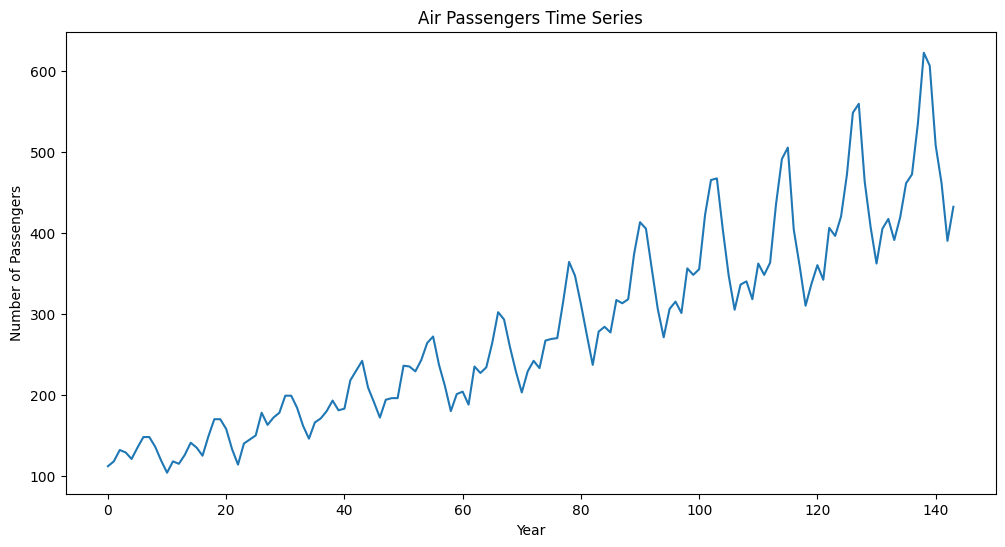

In [8]:
# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=data.index, y=passengers)
plt.title('Air Passengers Time Series')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.show()

## Seasonal Decomposition Plot

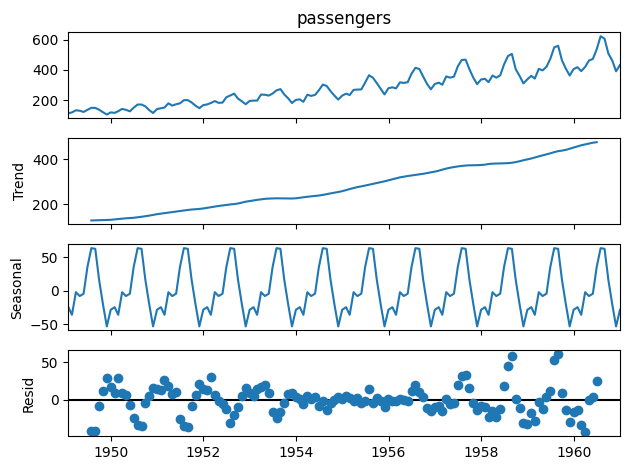

In [11]:
passengers.index = pd.date_range(start='1949-01', periods=len(passengers), freq='M')

# Perform seasonal decomposition
decomposition = seasonal_decompose(passengers, model='additive')


# Plot the decomposed components
decomposition.plot()
plt.show()

## Box Plot

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


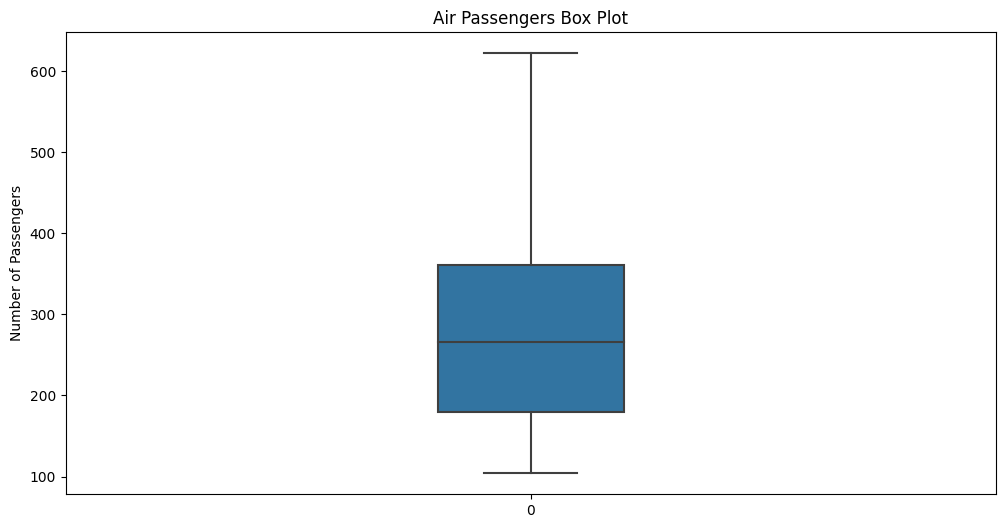

In [12]:
# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=passengers, width=0.2)
plt.title('Air Passengers Box Plot')
plt.ylabel('Number of Passengers')
plt.show()

## ACF Plots

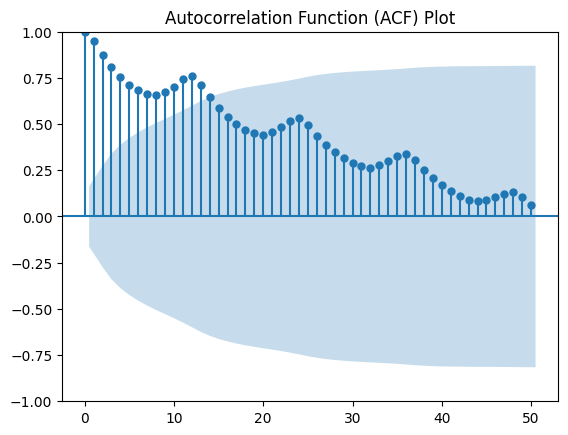

In [14]:
# Create an ACF plot
plot_acf(passengers, lags=50)
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()

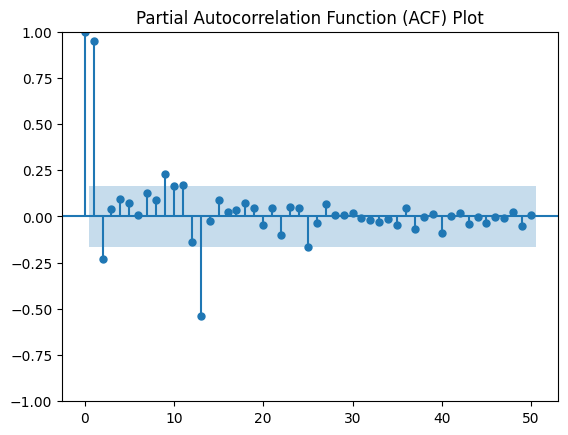

In [16]:
# Create an PACF plot
plot_pacf(passengers, lags=50)
plt.title('Partial Autocorrelation Function (ACF) Plot')
plt.show()